# Data Analytics Competition FIND IT 2024

### Task
Sebuah toko melakukan 6 kali promosi ke pelanggan untuk sebuah program promosi tertentu. Buatlah model machine learning untuk memprediksi pada promosi ke berapa pelanggan akan menerima program promosi dari toko tersebut. Model ini diharapkan mampu membantu toko untuk memahami pelanggan lebih baik sehingga pelaksanaan program promosi ke depan dapat lebih efektif dan efisien.

### Team Members:
1. Fadian Alif Mahardika
2. Aqila Ataa
3. Yasmin Farisah Salma

### Dataset Description
#### Files
1. `training_set_features.csv` - the training set of features
2. `training_set_labels.csv` - the training set of labels
3. `test_set_features.csv` - the test set
4. `submission_format.csv` - a sample submission file in the correct format

#### Column Explanation
1. **tahun_kelahiran**      : Tahun kelahiran pelanggan
2. **pendidikan**           : Tingkat pendidikan pelanggan (SMP, SMA, Sarjana, Magister, Doktor)
3. **status_pernikahan**    : Status pernikahan pelanggan (Sendiri, Rencana Menikah, Menikah)
4. **pendapatan**           : Pendapatan pelanggan dalam rupiah
5. **jumlah_anak_balita**   : Banyaknya anak pelanggan yang masih balita
6. **jumlah_anak_remaja**   : Banyaknya anak pelanggan yang sudah remaja
7. **terakhir_belanja**     : Jumlah hari berlalu setelah terakhir belanja
8. **belanja_buah**         : Biaya yang dikeluarkan untuk belanja buah
9. **belanja_daging**       : Biaya yang dikeluarkan untuk belanja daging
10. **belanja_ikan**        : Biaya yang dikeluarkan untuk belanja ikan
11. **belanja_kue**         : Biaya yang dikeluarkan untuk belanja kue
12. **pembelian_diskon**    : Banyaknya pembelian yang dilakukan saat diskon
13. **pembelian_web**       : Banyaknya pembelian yang dilakukan secara daring
14. **pembelian_toko**      : Banyaknya pembelian yang dilakukan secara luring
15. **keluhan**             : 1 - pernah memberikan keluhan, 0 - tidak pernah
16. **tanggal_menjadi_anggota** : Tanggal pertama kali terdaftar sebagai anggota
17. **jumlah_promosi (target)** : Pada promosi ke berapa pelanggan menerima program dari toko, dari total 6 kali promosi yang dilakukan. Nilai 0 berarti tidak menerima sama sekali

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from imblearn.over_sampling import SMOTE

# Data Preparation
1. Reading Data:
    - Reads training features from "train_features.csv" into train_features_df.
    - Reads training labels from "train_labels.csv" into train_labels_df.
    - Reads test features from "test_features.csv" into test_data.
2. Removing irrelevant data:
    - 'tanggal_menjadi_anggota' is removed because it has too many missing values.
2. Concatenating Features and Labels:
    - Concatenates train_features_df and train_labels_df along columns (axis=1) into train_data.
    - Drops duplicate rows from train_data.
    - Drops duplicate rows from test_data.
3. Preprocessing: Mapping Categorical Variables to Numerical Values:
    - Defines mappings for 'pendidikan' and 'status_pernikahan' from categorical to numerical values.
    - Maps categorical values to numerical values for 'pendidikan' and 'status_pernikahan' columns in both training and test data.
4. Handling Missing Values:
    - Calculates the mean values for each attribute in both training and test data.
    - Fills missing values in both datasets with their respective mean values.
5. Describing the Data:
    - Generate summary statistics for the datasets to understand the distribution of data in each column.

In [2]:
# Read the data
train_features_df = pd.read_csv("train_features.csv")
train_labels_df = pd.read_csv("train_labels.csv")
test_data = pd.read_csv("test_features.csv")

# Removing irrelevant data
train_features_df = train_features_df.drop(columns=['tanggal_menjadi_anggota'])
test_data = test_data.drop(columns=['tanggal_menjadi_anggota'])

# Concatenate features and labels for training data
train_data = pd.concat([train_features_df, train_labels_df], axis=1).drop_duplicates()
test_data = test_data.drop_duplicates()

# Preprocessing: Map categorical variables to numerical values
mapping_pendidikan = {
    'SMP': 2,
    'SMA': 1,
    'Sarjana': 3,
    'Magister': 4,
    'Doktor': 5
}

mapping_status_pernikahan = {
    'Sendiri': 1,
    'Rencana Menikah': 2,
    'Menikah': 3
}

attribut = ['pendidikan', 'status_pernikahan', 'pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan']
train_data['pendidikan'] = train_data['pendidikan'].map(mapping_pendidikan)
train_data['status_pernikahan'] = train_data['status_pernikahan'].map(mapping_status_pernikahan)
test_data['pendidikan'] = test_data['pendidikan'].map(mapping_pendidikan)
test_data['status_pernikahan'] = test_data['status_pernikahan'].map(mapping_status_pernikahan)
means_train = train_data[attribut].mean()
means_test = test_data[attribut].mean()
train_data[attribut] = train_data[attribut].fillna(means_train)
test_data[attribut] = test_data[attribut].fillna(means_test)

FileNotFoundError: [Errno 2] No such file or directory: 'train_features.csv'

In [ ]:
train_data.describe()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
count,3817.000000,3817.000000,3817.000000,3.817000e+03,3817.000000,3817.000000,3817.000000,3817.000000,3.817000e+03,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000
mean,1967.823946,3.193326,2.044478,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971,2.585800
std,11.768131,1.044537,0.736936,4.236466e+07,0.461135,0.479655,26.451444,72248.078389,4.999578e+05,97415.199949,77175.965468,2.050567,2.936891,3.138836,0.068509,2.101845
min,1899.000000,1.000000,1.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,3.000000,1.000000,8.260853e+07,0.000000,0.000000,25.000000,8092.000000,5.259800e+04,10337.000000,8092.000000,1.000000,2.000000,3.000000,0.000000,0.000000
50%,1968.000000,3.000000,2.000000,1.144832e+08,0.000000,0.000000,47.231550,30345.000000,2.495720e+05,40670.000000,32368.000000,2.000000,4.000000,5.767818,0.000000,3.000000
75%,1976.000000,4.000000,3.000000,1.479535e+08,1.000000,1.000000,68.000000,81740.000000,6.403940e+05,115037.000000,84522.000000,3.000000,6.000000,8.000000,0.000000,4.000000
max,2000.000000,5.000000,3.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000,6.000000


In [ ]:
test_data.describe()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
count,3818.000000,3818.000000,3818.000000,3818.000000,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,3841.507072,1967.789942,3.202935,2.045697,1.163249e+08,0.282904,0.355322,47.181366,61234.083425,4.528484e+05,85338.612093,63801.505921,2.101676,4.465091,5.835628,0.002759
std,2198.401006,11.808572,1.019106,0.740137,4.967514e+07,0.452095,0.483004,26.221368,74756.774026,4.990626e+05,101089.673885,76483.259673,2.065370,2.865561,3.207229,0.051114
min,2.000000,1892.000000,1.000000,1.000000,2.998899e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.750000,1959.000000,3.000000,1.000000,8.335937e+07,0.000000,0.000000,26.000000,8092.000000,6.083450e+04,10721.750000,8200.500000,0.000000,2.000000,3.000000,0.000000
50%,3872.500000,1968.000000,3.000000,2.000000,1.163249e+08,0.000000,0.000000,47.181366,34024.000000,2.661885e+05,46147.500000,34391.000000,2.000000,4.000000,5.835628,0.000000
75%,5770.750000,1976.000000,4.000000,3.000000,1.487817e+08,1.000000,1.000000,67.000000,81260.250000,6.896120e+05,123260.750000,86989.000000,3.000000,6.000000,8.000000,0.000000
max,7634.000000,2009.000000,5.000000,3.000000,1.305740e+09,2.000000,2.000000,133.000000,408646.000000,3.271191e+06,574932.000000,532049.000000,17.000000,27.000000,17.000000,1.000000


# Data Exploration
- Visualize the distribution of the target variable and features.
- Explore relationships between features.

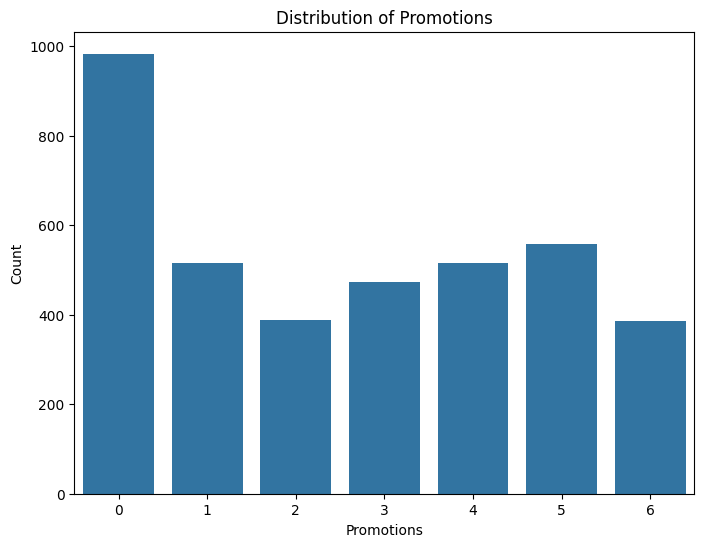

<Figure size 1200x800 with 0 Axes>

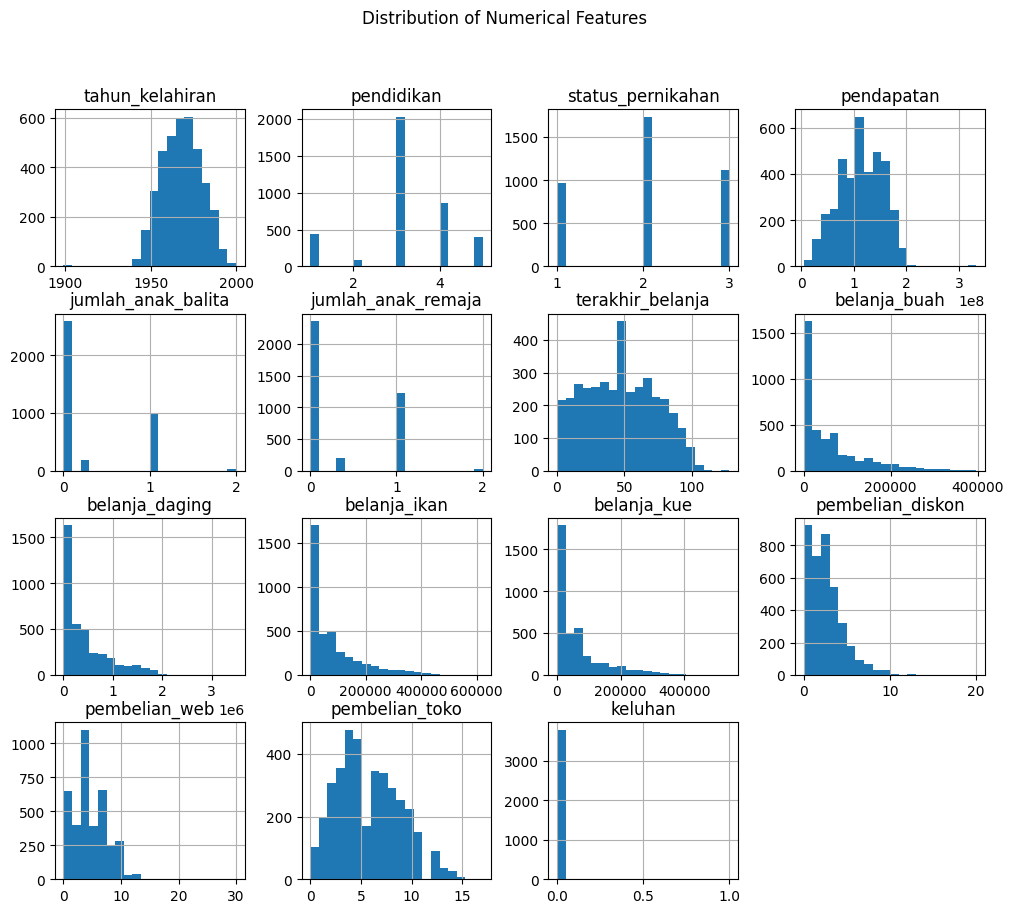

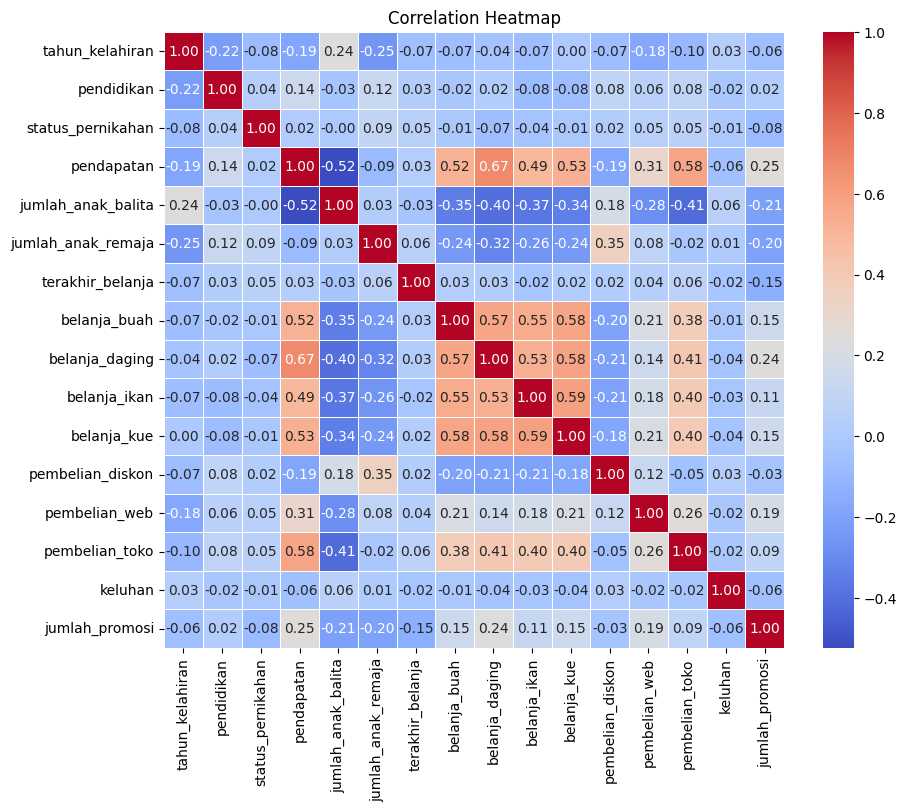

In [ ]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='jumlah_promosi')
plt.title('Distribution of Promotions')
plt.xlabel('Promotions')
plt.ylabel('Count')
plt.show()

# Visualize distribution of numerical features
plt.figure(figsize=(12, 8))
train_data.drop(columns=['jumlah_promosi']).hist(bins=20, figsize=(12,10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Model Training
1. Define features and target variable.
2. Apply SMOTE for oversampling.
3. Define the base classifier and hyperparameters grid for BaggingClassifier.
4. Perform grid search with cross-validation.

In [ ]:
# Define features and target variable
X_train = train_data.drop(columns=['jumlah_promosi'])
y_train = train_data['jumlah_promosi']  

X_test = test_data.drop(columns=['ID'])

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid for BaggingClassifier
param_grid = {
    'n_estimators': [500],  
    'max_samples': [1.0],
    'max_features': [0.5],
    'bootstrap': [False],
    'bootstrap_features': [False],
}

# Initialize BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, random_state=42)

# Define custom scorer for macro F1-score
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'macro_f1': macro_f1_scorer}, refit='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'bootstrap_features': [False],
                         'max_features': [0.5], 'max_samples': [1.0],
                         'n_estimators': [500]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'macro_f1': make_scorer(f1_score, response_method='predict', average=macro)})

# Model Evaluation
1. Display the best hyperparameters and corresponding scores.
2. Make predictions using the best model obtained through grid search.
3. Visualize the confusion matrix and classification report.

In [ ]:
# Get the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_macro_f1 = grid_search.cv_results_['mean_test_macro_f1'][grid_search.best_index_]

print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")
print(f"Best macro F1-score: {best_macro_f1:.4f}")

# Make predictions using the best model obtained through grid search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 500}
Best accuracy: 0.9018
Best macro F1-score: 0.9020


# Submission
Save the predictions to a CSV file.

In [ ]:
# Save the predictions
test_data['jumlah_promosi'] = best_model.predict(test_data.drop(columns=['ID']))
test_data[['ID', 'jumlah_promosi']].to_csv('MasukFinalPls.csv', index=False)

print("Prediction completed and saved.")

Prediction completed and saved.


# Conclusion
The discrepancy between the reported best accuracy and macro F1-score during training (0.9018 and 0.9020, respectively) and the test score (0.81374) suggests potential issues in the model's generalization ability. Several factors could contribute to this difference:

1. Possible Overfitting: While the model performed well during training, it might have overfit the training data, leading to a drop i performance on unseen data. This could be due to the complexity of the Decision Tree base classifier or the ensemble itself.
2. Data Imbalance: Although SMOTE was used to address class imbalance, the synthetic samples generated might not perfectly represent the distribution of the test set, leading to a performance gap between train and test data.
3. Hyperparameter Sensitivity: The hyperparameters tuned through grid search may not have generalized well to the test data. Different parameter configurations might yield better performance on unseen data.
4. Model Sensitivity: Decision Trees are known for being sensitive to variations in the data. If the test set contains different patterns or characteristics than the training set, it could impact the model's performance negatively.

To address these issues and improve model performance on unseen data, further investigation and experimentation are recommended. This might involve trying different models or ensemble methods, ensuring no data leakage during preprocessing, and possibly refining the hyperparameter search strategy to find parameters that generalize better to unseen data. Additionally, analyzing the distribution of classes in the test set and comparing it to the training set can provide insights into potential data distribution discrepancies.